# sklearn.neighbors.KNeighborsClassifier

## 1 - 参数解释

In [ ]:
KNeighborsClassifier(n_neighbors=5, weights='uniform', 
                     algorithm='auto', leaf_size=30, 
                     p=2, metric='minkowski',
                     metric_params=None,n_jobs=None, **kwargs)

| 参数名称 |参数取值|参数解释|
| :-----: | :----: | :---- |
| n_neighbors| int，默认值为5| 表示k-nn算法中选取离测试数据最近的k个点 | 
| weight | str or callable，默认值为uniform | 表示k近邻点都分类结果的影响，一般的情况下是选取k近邻点中类别数目最多的作为分类结果，这种情况下默认k个点的权重相等，但在很多情况下，k近邻点权重并不相等，可能近的点权重大，对分类结果影响大。默认值为uniform，还可以是distance和自定义函数。<br><br>uniform：表示所有点的权重相等<br>distance：表示权重是距离的倒数，意味着k个点中距离近的点对分类结果的影响大于距离远的点<br>[callable]：用户自定义函数，接受一个距离数组，返回一个同维度的权重数|
| algorithm | {'ball_tree','kd_tree','brute','auto'}，<br>计算找出k近邻点的算法 |ball_tree：使用BallTree维数大于20时建议使用 <br> kd_tree：使用KDTree，原理是数据结构的二叉树，以中值为划分，每个节点是一个超矩形，在维数小于20是效率高 <br> brute：暴力算法，线性扫描 <br> auto：自动选取最合适的算法 <br> 注意：当输入数据稀疏，会忽略并统一用brute  |
| leaf_size | int，默认值为30 | 用于构造BallTree和KDTree。leaf_size参数设置会影响树构造的树构造和询问的速度，同样也会影响树存储需要的内存，这个值的设定取决于问题本身 |
| p | int，默认值为2 | p=1：使用曼哈顿距离进行度量<br> p=2：使用欧式距离进行度量 <br>p=$\infty$：使用切比雪夫距离进行度量|
| metric| string或callable类型，默认为minkowski | 树的距离度量|
| metric_params | dict, 默认为None | 度量函数的其他关键参数，一般不用设置 |
| n_jobs | int or None, 默认None | 用于搜索k近邻点并行任务数量，-1表示任务数量设置为CPU的核心数，即CPU的所有core都并行工作，不会影响fit(拟合)函数 |
|effective_metric_	| string或callable类型 | 距离度量机制，与metric对应 |
| effective_metric_params_	|dict类型 | 度量函数的关键参数|
| outputs_2d_	| bool型 | y的格式为 (n_samples, ) 或 (n_samples, 1) 为true，回归模型没有|


## 2 - 属性解释

| 属性名称 | 属性解释 |
| :-----: | :----: | 
| fit(self, X, y)	| 模型拟合，根据X训练集和标注y |
| get_params(self[, deep]) | 获得模型参数 |
| kneighbors(self[, X, n_neighbors, …]) | 获取某节点的k个近邻 |
| kneighbors_graph(self[, X, n_neighbors, mode]) | 计算X实例的k近邻权重图 |
| predict(self, X) | 预测X的类别 |
| predict_proba(self, X) | 返回X的概率估计，回归模型没有 |
| score(self, X, y[, sample_weight]) | 返回指定测试集的平均准确度 |
| set_params(self, \*\*params) | 设置模型参数 |

## 3 - 实战应用

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### 实战应用1

In [11]:
iris = load_iris()
# 查看数据集的属性
iris.keys()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = iris.target
df = df.iloc[0:100, [0, 1, -1]]
df.columns = ['sepal length', 'sepal width', 'label']

In [13]:
data = np.array(df)
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
print("There are {} train samples".format(y_train.shape[0]))
print("There are {} test samples".format(y_test.shape[0]))

There are 80 train samples
There are 20 test samples


In [15]:
clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
clf_sk.score(X_test, y_test)

1.0

In [21]:
clf_sk.predict(X_test)

array([0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1.])

### 实战应用2

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [52]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# 创建颜色表
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
n_neighbors=15
for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x,y)

In [53]:
h = 0.2
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

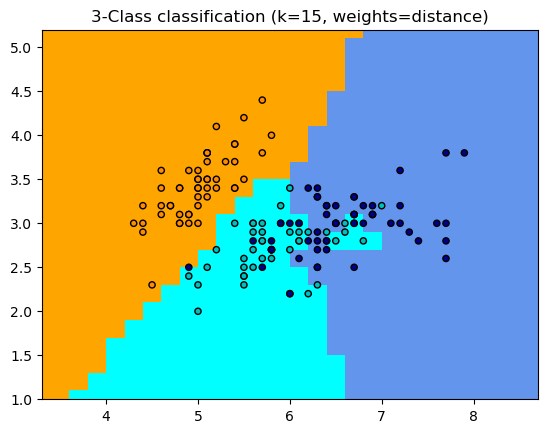

In [55]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k=%i, weights=%s)" % (n_neighbors, weights))
plt.show()